In [1]:
import cv2,os
from matplotlib import pyplot as plt

data_path='dataset'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels))

print(label_dict)
print(categories)
print(labels)

{'without_mask': 0, 'with_mask': 1}
['without_mask', 'with_mask']
[0, 1]


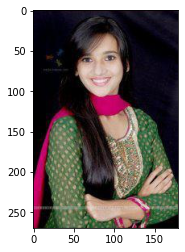

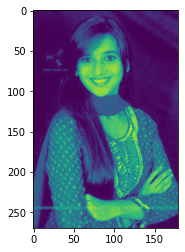

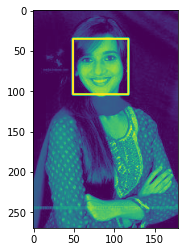

KeyboardInterrupt: 

In [68]:
img_size=100
data=[]
target=[]
i=1

for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
    
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img_data=cv2.imread(img_path)
        img=cv2.cvtColor(img_data, cv2.COLOR_BGR2RGB)
        face_cascade = cv2.CascadeClassifier("utils/haarcascade_frontalface_default.xml")
        
        if i==1:
            plt.imshow(img)
            plt.show()
        
        try:
            gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
            
            if i==1:
                plt.imshow(gray)
                plt.show()
                
            detected_faces = face_cascade.detectMultiScale(gray)
            
            for(x, y, w, h) in detected_faces:
                roi_gray = gray[y:y+h, x:x+w]
                roi_color = img[y:y+h, x:x+w]
                data.append(np.array(roi_gray))
                cv2.rectangle(gray,(x,y),(x+w,y+h),(255,0,0),2)
                
                if i==1:
                    plt.imshow(gray)
                    plt.show()
                    i=0

            target.append(label_dict[category])

        except Exception as e:
            print('Exception:',e)

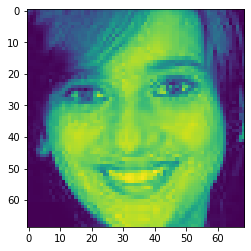

In [51]:
i=1
for img in data:
    if i==1:
        plt.imshow(img)
        plt.show()
        i=0
    